In [235]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
df = pd.read_csv('all-domains-30-days-2.csv', index_col = "domain")

In [237]:
df

,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
domain,,,,,,
tools.usps.com,169826683,244948264,61743402,1.442343,96.203466,171018521
ncbi.nlm.nih.gov,124014952,224875543,68751094,1.813294,175.393462,122838694
cdc.gov,109267329,188615647,79109951,1.726185,94.175632,109125555
pubmed.ncbi.nlm.nih.gov,107153181,340591257,53737060,3.178545,242.998822,108595849
medlineplus.gov,55414980,70414992,41750137,1.270685,68.748320,55374473
...,...,...,...,...,...,...
wwwkc.fiscal.treasury.gov,1558,3116,1558,2.000000,868.976252,1558
yellowtask.ncifcrf.gov,1558,3116,1558,2.000000,64.998074,1558
yokota.tricare.mil,1558,1558,1558,1.000000,0.000000,1558


In [238]:
x = df.shape[0]

In [239]:
df.duplicated().sum()
#There are 621 duplicate rows

621

In [240]:
df.loc[df.duplicated(keep='first'), :]
#Mark Duplciates as true except for the first Occurenct of the duplciate hence the keep = 'first'

,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
domain,,,,,,
dhs.usajobs.gov,12464,12464,12464,1.0,0.000000,12464
920rqw.afrc.af.mil,10906,10906,9348,1.0,0.000000,10906
search.gov,10906,10906,10906,1.0,0.000000,10906
townhall.nasa.gov,9348,9348,4674,1.0,0.000000,9348
wv.ng.mil,9348,9348,7790,1.0,0.000000,9348
...,...,...,...,...,...,...
www-search.uspto.gov,1558,1558,1558,1.0,0.000000,1558
www1-1-pz.sewp.nasa.gov,1558,1558,1558,1.0,0.000000,1558
www9.jsc.nasa.gov,1558,1558,1558,1.0,20.999358,0


In [241]:
df = df.drop_duplicates(keep = 'first')

In [242]:
y = df.shape[0]

In [243]:
number_of_duplicate_rows = x - y

In [244]:
print(number_of_duplicate_rows)

621


In [245]:
#Understand the top ten most visted websites+
df_sorted_visits = df.sort_values(by = "visits", ascending = False)

In [246]:
#ten most visited websites
df_10 = df_sorted_visits.head(10)

In [247]:
df_10.columns

Index(['visits', 'pageviews', 'users', 'pageviews_per_session',
       'avg_session_duration', 'exits'],
      dtype='object')

In [248]:
df_10.reset_index(inplace=True)

<AxesSubplot:xlabel='domain'>

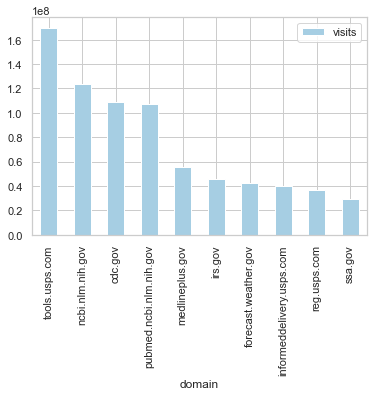

In [249]:
df_10.plot(kind = "bar", x = "domain", y = "visits", colormap = 'Paired')

<AxesSubplot:title={'center':'Top 10 Visited US Government Domains'}, xlabel='Domain', ylabel='Visits (M)'>

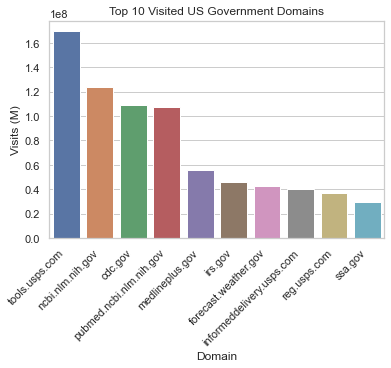

In [250]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="domain", y="visits", data=df_10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("Visits (M)")
ax.set_xlabel("Domain")
ax.set_title("Top 10 Visited US Government Domains")
ax

In [251]:
df_10

,domain,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits
0,tools.usps.com,169826683,244948264,61743402,1.442343,96.203466,171018521
1,ncbi.nlm.nih.gov,124014952,224875543,68751094,1.813294,175.393462,122838694
2,cdc.gov,109267329,188615647,79109951,1.726185,94.175632,109125555
3,pubmed.ncbi.nlm.nih.gov,107153181,340591257,53737060,3.178545,242.998822,108595849
4,medlineplus.gov,55414980,70414992,41750137,1.270685,68.748320,55374473
5,irs.gov,45648146,119657345,23740152,2.621297,138.799386,45210360
6,forecast.weather.gov,42544695,83129481,10008317,1.953933,98.654644,44140044
7,informeddelivery.usps.com,39938233,99230968,8847639,2.484611,76.835849,45468981
8,reg.usps.com,36826992,49871768,15799244,1.354218,49.125688,30694873
9,ssa.gov,29169633,68360046,17174920,2.343535,177.471077,28988910


In [252]:
df_10['time_spent_per_page'] = (df_10['avg_session_duration']/df_10['pageviews_per_session'])

<ipython-input-252-9a2d57c24d5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['time_spent_per_page'] = (df_10['avg_session_duration']/df_10['pageviews_per_session'])


In [253]:
df_10

,domain,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits,time_spent_per_page
0,tools.usps.com,169826683,244948264,61743402,1.442343,96.203466,171018521,66.699454
1,ncbi.nlm.nih.gov,124014952,224875543,68751094,1.813294,175.393462,122838694,96.726445
2,cdc.gov,109267329,188615647,79109951,1.726185,94.175632,109125555,54.557085
3,pubmed.ncbi.nlm.nih.gov,107153181,340591257,53737060,3.178545,242.998822,108595849,76.449692
4,medlineplus.gov,55414980,70414992,41750137,1.270685,68.748320,55374473,54.103347
5,irs.gov,45648146,119657345,23740152,2.621297,138.799386,45210360,52.950654
6,forecast.weather.gov,42544695,83129481,10008317,1.953933,98.654644,44140044,50.490292
7,informeddelivery.usps.com,39938233,99230968,8847639,2.484611,76.835849,45468981,30.924701
8,reg.usps.com,36826992,49871768,15799244,1.354218,49.125688,30694873,36.276061
9,ssa.gov,29169633,68360046,17174920,2.343535,177.471077,28988910,75.727951


In [254]:
df_10 = df_10.sort_values(["users", "time_spent_per_page"], ascending = (False, True))

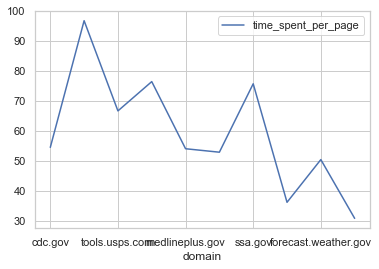

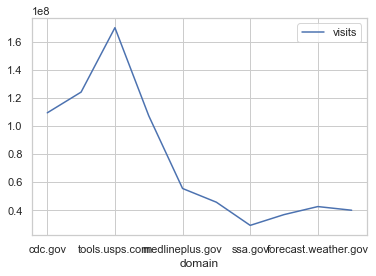

In [255]:

df_10.plot(kind = "line", x = "domain", y = "time_spent_per_page")
df_10.plot(kind = "line", x = "domain", y = "visits")
plt.show()

<AxesSubplot:title={'center':'Top 10 US Government Domain Visit Durations'}, xlabel='Domain', ylabel='Time Spent Per Page (Seconds)'>

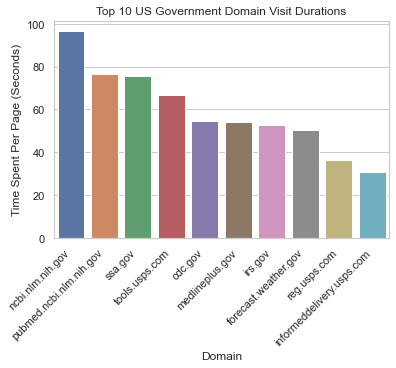

In [256]:
df_10_sorted_time = df_10.sort_values(by = "time_spent_per_page", ascending = False)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="domain", y="time_spent_per_page", data=df_10_sorted_time)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("Time Spent Per Page (Seconds)")
ax.set_xlabel("Domain")
ax.set_title("Top 10 US Government Domain Visit Durations")
ax

In [257]:
correlation = df_10["time_spent_per_page"].corr(df_10['visits'])
print(correlation)

0.5411544129865875


<AxesSubplot:xlabel='domain'>

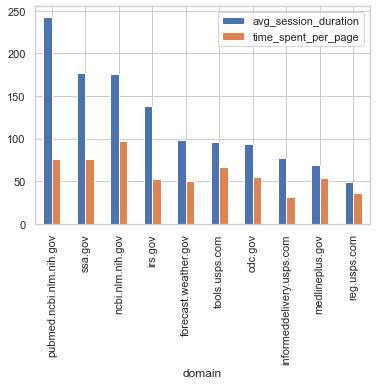

In [258]:
df_10 = df_10.sort_values('avg_session_duration', ascending = False)
df_10.plot(x = "domain", y = ["avg_session_duration", "time_spent_per_page"], kind = 'bar')

In [259]:
correlation = df_10["time_spent_per_page"].corr(df_10['avg_session_duration'])
print(correlation)

0.7660614356869898


In [260]:
print("There is a strong correlation between the orginal columns Average_Session_Duation and the column we made Time_Spent_Per_Page. Which makes perfect sense. This may aslo indciate which websites the goverment may need to simplify to be".format(correlation))

There is a strong correlation between the orginal columns Average_Session_Duation and the column we made Time_Spent_Per_Page. Which makes perfect sense. This may aslo indciate which websites the goverment may need to simplify to be


In [261]:
print("Sice the correlation is {} the two variabvles move in tandem however since the correaltion is in the range of .3 and .5 there is a weak relaitonship between the two variables".format(correlation))

Sice the correlation is 0.7660614356869898 the two variabvles move in tandem however since the correaltion is in the range of .3 and .5 there is a weak relaitonship between the two variables


In [262]:
df_10["percent_diff_users_visits"] = ((df_10['visits']-df_10['users'])/df_10['users'])

In [263]:
df_10

,domain,visits,pageviews,users,pageviews_per_session,avg_session_duration,exits,time_spent_per_page,percent_diff_users_visits
3,pubmed.ncbi.nlm.nih.gov,107153181,340591257,53737060,3.178545,242.998822,108595849,76.449692,0.994028
9,ssa.gov,29169633,68360046,17174920,2.343535,177.471077,28988910,75.727951,0.698385
1,ncbi.nlm.nih.gov,124014952,224875543,68751094,1.813294,175.393462,122838694,96.726445,0.803825
5,irs.gov,45648146,119657345,23740152,2.621297,138.799386,45210360,52.950654,0.922825
6,forecast.weather.gov,42544695,83129481,10008317,1.953933,98.654644,44140044,50.490292,3.250934
0,tools.usps.com,169826683,244948264,61743402,1.442343,96.203466,171018521,66.699454,1.750524
2,cdc.gov,109267329,188615647,79109951,1.726185,94.175632,109125555,54.557085,0.381208
7,informeddelivery.usps.com,39938233,99230968,8847639,2.484611,76.835849,45468981,30.924701,3.513999
4,medlineplus.gov,55414980,70414992,41750137,1.270685,68.748320,55374473,54.103347,0.327301
8,reg.usps.com,36826992,49871768,15799244,1.354218,49.125688,30694873,36.276061,1.330934


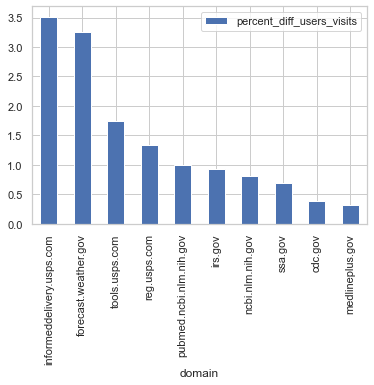

In [264]:
df_10 = df_10.sort_values('percent_diff_users_visits', ascending = False)
df_10.plot(kind = "bar", x = "domain", y = "percent_diff_users_visits")
plt.show()

<AxesSubplot:title={'center':'Top 10 US Government Domain Visit Durations'}, xlabel='Domain', ylabel='Time Spent Per Page (Seconds)'>

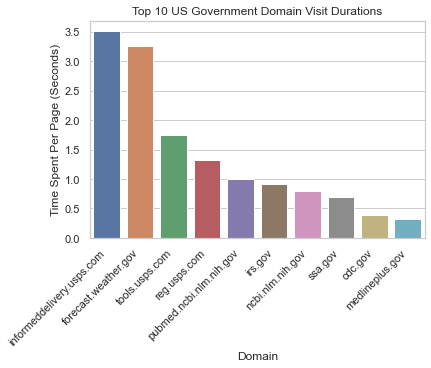

In [265]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="domain", y="percent_diff_users_visits", data=df_10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("Time Spent Per Page (Seconds)")
ax.set_xlabel("Domain")
ax.set_title("Top 10 US Government Domain Visit Durations")
ax
#NEED TO CHANGE AXES (ANY GOOD NAMES IN MIND?)

In [219]:
correlation = df_10["visits"].corr(df_10['users'])
print(correlation)

0.8594456904259306


In [221]:
print("Obviously there will be a strong correlation of {} between visits and users. However what I found most intresting in the percent change grpah is the 3/4 websites were mailing sites. The reasoning behind this coould be that since they are all usps website and people typcially don't have user accounts for usps websites".format(correlation))

Obvoiusly there will be a strong correlation of 0.8594456904259306 between visits and users. However what I found most intresting in the percent change grpah is the 3/4 websites were mailing sites. The reasoning behind this coould be that since they are all usps website and people typcially don't have user accounts for usps websites
